In [10]:
!pip install tensorflow==1.15.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!pip install -q lucid>=0.2.3
!pip install -q moviepy

In [9]:
!pip install imageio==2.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import numpy as np
import json
import moviepy.editor as mvp
from google.colab import files
import tensorflow.compat.v1.gfile as gfile
import lucid.misc.io.showing as show

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3817472/45929032 bytes (8.3%)7725056/45929032 bytes (16.8%)12058624/45929032 bytes (26.3%)15974400/45929032 bytes (34.8%)20037632/45929032 bytes (43.6%)24264704/45929032 bytes (52.8%)28303360/45929032 bytes (61.6%)32374784/45929032 bytes (70.5%)36552704/45929032 bytes (79.6%)39763968/45929032 bytes (86.6%)42983424/45929032 bytes (93.6%)45929032/45929032 bytes (100.0%)
  Done
File saved as /root

In [7]:
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 800,600
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


In [178]:
def DrawLine(x1, y1, x2, y2):

  dx = x2 - x1

  dy = y2 - y1

  d = 2*dy -dx

  incE = 2*dy

  incNE = 2*(dy-dx)

  y = y1

  x = x1

  if x2==x1:

    while y<=y2:

      WritePixel(x,y)

      y += 0.01

  else:

    while x<=x2:

      WritePixel(x,y)

      if(d>0):

        d = d + incNE

        y +=0.01

      else:

        d = d + incE

        x += 0.01

def WritePixel(x, y):

  gl.glBegin(gl.GL_POINTS)
  
  gl.glVertex2f(x, y)
  
  gl.glEnd()



# Lines Start


def top(x, y):

  DrawLine(x, y, x+0.3, y)

def mid(x, y):

  DrawLine(x, y-0.5, x+0.3, y-0.5)

def bottom(x, y):

  DrawLine(x, y-1, x+0.3, y-1)

def left_above(x,y):

  DrawLine(x, y-0.5, x, y)

def left_bottom(x, y):

  DrawLine(x, y-1, x, y-0.5)

def right_above(x,y):

  DrawLine(x+0.3, y-0.5, x+0.3, y)

def right_bottom(x, y):

  DrawLine(x+0.3, y-1, x+0.3, y-0.5)


# Lines Finish







#Output

def output(value, x, y):

  if value == "0":

    top(x, y)

    right_above(x, y)

    right_bottom(x, y)

    left_above(x, y)

    left_bottom(x, y)

    bottom(x, y)

  elif value == "1":

    right_above(x, y)

    right_bottom(x, y)

  elif value == "2":

    top(x, y)

    right_above(x, y)

    mid(x, y)

    left_bottom(x, y)

    bottom(x, y)

  elif value == "3":

    top(x, y)

    right_above(x, y)

    mid(x, y)

    right_bottom(x, y)

    bottom(x, y)

  elif value == "4":

    left_above(x, y)

    mid(x, y)

    right_above(x, y)

    right_bottom(x, y)


  elif value == "5":

    top(x, y)

    left_above(x, y)

    mid(x, y)

    right_bottom(x, y)
    
    bottom(x, y)


  elif value == "6":

    top(x, y)
    
    left_above(x, y)

    left_bottom(x, y)

    mid(x, y)
    
    right_bottom(x, y)
    
    bottom(x, y)

  elif value == "7":

    top(x, y)
    
    right_above(x, y)
    
    right_bottom(x, y)
  
  elif value == "8":

    top(x, y)

    left_above(x, y)

    left_bottom(x, y)

    mid(x, y)

    right_above(x, y)

    right_bottom(x, y)

    bottom(x, y)

  elif value == "9":

    top(x, y)

    left_above(x, y)

    mid(x, y)

    right_above(x,y)

    right_bottom(x,y)
    
    bottom(x,y)






gl.glClear(gl.GL_COLOR_BUFFER_BIT)

gl.glColor3f(75,0,130)

gl.glPointSize(8)

ID = "20101231"

ID = list(ID)

last_1 = ID[-1]

last_2 = ID[-2]

output(last_2, -0.4, 0.5)

output(last_1, 0, 0.5)



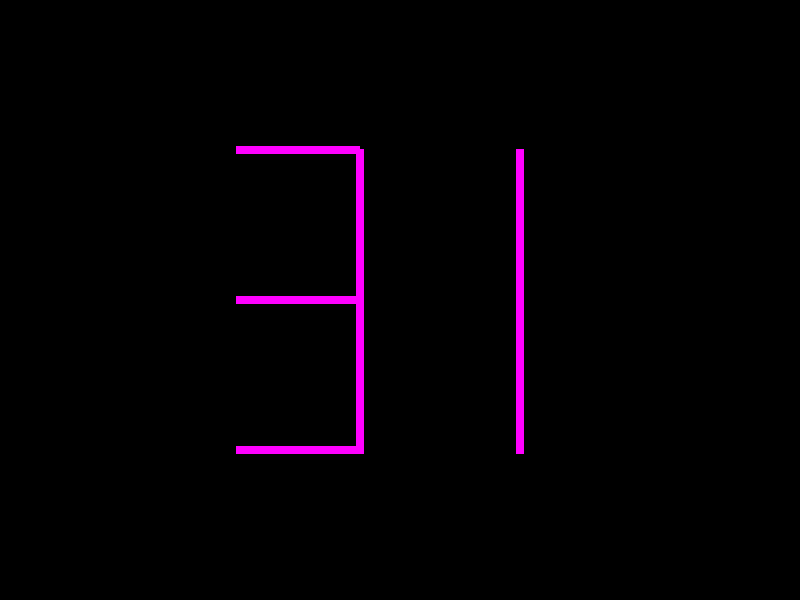

In [179]:
img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)

img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]

show.image(img/255.0)